### Setup environment

In [ ]:
!pip install requirements.txt

In [2]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math

### Execute Simulations

#### Skip if you already have results

In [ ]:
def simulate(n_nodes, tx_rate, exp, duration):
    os.system(f"python3 loraDir3.py {n_nodes} {tx_rate} {exp} {duration}")

tx_rate = 1e6  # interval of messages in milliseconds 
duration = 86400000  # duration in milliseconds
for n_nodes in list(range(1, 10)) + list(range(10, 300, 10)) + list(range(300, 700, 50)) + list(range(700, 1000, 100)):
    print(f"N_nodes: {n_nodes}")
    simulate(n_nodes, tx_rate, 0, duration)
    simulate(n_nodes, tx_rate, 2, duration)
    simulate(n_nodes, tx_rate, 4, duration)

### Parse data and plot results

#### Import data

In [5]:
#read data
data = pd.read_csv("exp0.dat", sep=" ")
data2 = pd.read_csv("exp2.dat", sep=" ")
data4 = pd.read_csv("exp4.dat", sep=" ")

#### Compute DER

In [6]:
# Der in aloha defined as S/G = e^(-2G)
def aloha_der(n_nodes,t):
    rate = 1e-6
    return math.exp(-2 * n_nodes * rate * t)

data["der"] = (data["nrTransmissions"] - data["nrCollisions"]) / data["nrTransmissions"]
data["der_aloha"] = data["#nrNodes"].apply(lambda x: aloha_der(x,t=1712))
data2["der"] = (data2["nrTransmissions"] - data2["nrCollisions"]) / data2["nrTransmissions"]
data4["der"] = (data4["nrTransmissions"] - data4["nrCollisions"]) / data4["nrTransmissions"]


#### Plot

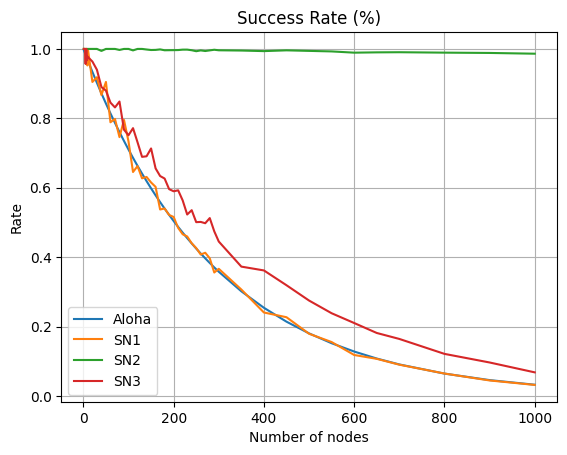

In [7]:
plt.plot(data["#nrNodes"], data["der_aloha"], label="Aloha")
plt.plot(data["#nrNodes"], data["der"], label="SN1")
plt.plot(data2["#nrNodes"], data2["der"], label="SN2")
plt.plot(data4["#nrNodes"], data4["der"], label="SN3")
plt.title("Success Rate (%)")
plt.xlabel("Number of nodes")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()